Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Andrew Wolfe"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
#import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
#import datetime
#import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "YOUR_API_KEY"

In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

#start = datetime.datetime(2013, 11, 12)
#end = datetime.datetime(2018, 11, 12)

#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

2) Download the last 60 months of adjusted close data for the stocks mentioned

In [5]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['FB','MMM','IBM','AMZN']

#Get today's date and subtract 60 months from it
today_date = datetime.date(datetime.now())
sixty_months_date = today_date + relativedelta(months=-60)

all_stocks = yf.download(all_stocks_list, start = sixty_months_date)
adj_close = all_stocks["Adj Close"]
#print(today_date)
#print(sixty_months_date)
adj_close.head()

[*********************100%***********************]  4 of 4 completed


,AMZN,FB,IBM,MMM
Date,,,,
2014-11-14,327.820007,74.879997,132.283310,139.249496
2014-11-17,323.049988,74.239998,132.283310,139.109207
2014-11-18,324.929993,74.339996,130.454056,140.389069
2014-11-19,326.540009,73.330002,130.083374,139.979248
2014-11-20,330.540009,73.599998,129.446808,140.446350


3) Resample data for each stock for end of business month

In [6]:
## TYPE YOUE CODE BELOW
adj_close_end_month = adj_close.resample("BM").mean()
adj_close_end_month.head()

,AMZN,FB,IBM,MMM
Date,,,,
2014-11-28,330.840005,74.909999,130.641835,140.114087
2014-12-31,308.786819,77.685454,128.905088,143.146805
2015-01-30,302.747501,76.721500,125.774295,143.020257
2015-02-27,375.745263,76.951053,129.657226,147.592347
2015-03-31,375.321361,81.013183,129.679873,146.592747


4) Autocorrelation of month end prices

In [7]:
#Amazon Stock Autocorrelation 
autocorrelation_plot(adj_close_end_month["AMZN"])

#The line for the most part is not between the 95% confidence interval so we can say 
#the Amazon stock is correlated to time

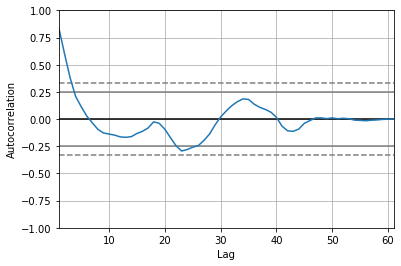

In [8]:
#IBM Stock Autocorrelation 
autocorrelation_plot(adj_close_end_month["IBM"])

#The IBM stock for the majority of the time series is within the 95% confidence interval, 
#thus we can say it is not correlated to time 

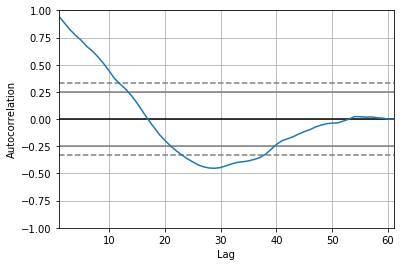

In [9]:
#MMM Stock Autocorrelation 
autocorrelation_plot(adj_close_end_month["MMM"])

#The MMM stock for has some pretty large timeframed swings not near the 0 marker
#Thus the stock is correlated to time 

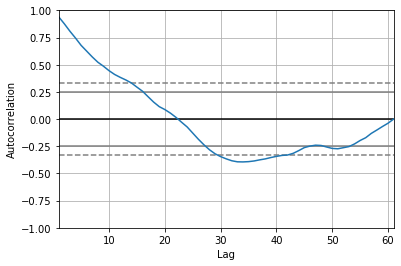

In [10]:
#FB Stock Autocorrelation 
autocorrelation_plot(adj_close_end_month["FB"])

#The FB stock has some pretty large timeframed swings not near the 0 marker
#Thus the stock is correlated to time 

5) Calculate monthly returns

In [11]:
month_returns = adj_close_end_month/adj_close_end_month.shift(1)-1
month_returns.head()

,AMZN,FB,IBM,MMM
Date,,,,
2014-11-28,NaN,NaN,NaN,NaN
2014-12-31,-0.066658,0.037051,-0.013294,0.021645
2015-01-30,-0.019558,-0.012408,-0.024288,-0.000884
2015-02-27,0.241118,0.002992,0.030872,0.031968
2015-03-31,-0.001128,0.052788,0.000175,-0.006773


In [12]:
month_returns_drop_na = month_returns.dropna()

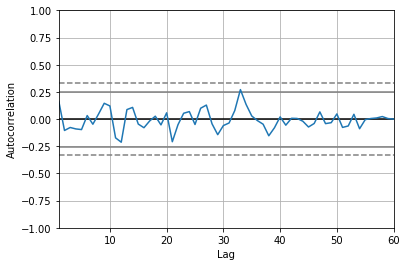

In [13]:
#Amazon Stock Autocorrelation 
autocorrelation_plot(month_returns_drop_na["AMZN"])

#No significant trend from looking at the month returns, thus the stock prices are not affected by time

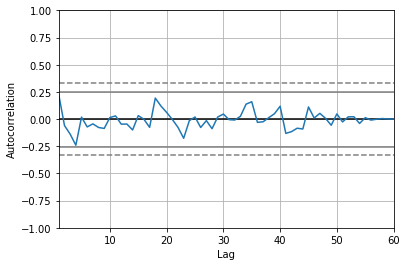

In [14]:
#IBM Stock Autocorrelation 
autocorrelation_plot(month_returns_drop_na["IBM"])

#No significant trend from looking at the month returns, thus the stock prices are not affected by time 

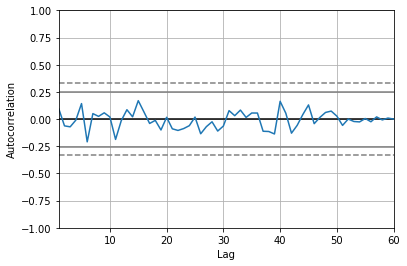

In [15]:
#MMM Stock Autocorrelation 
autocorrelation_plot(month_returns_drop_na["MMM"])

#No significant trend from looking at the month returns, thus the stock prices are not affected by time 

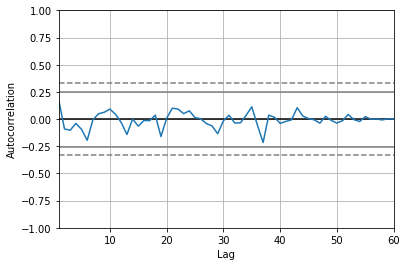

In [16]:
#FB Stock Autocorrelation 
autocorrelation_plot(month_returns_drop_na["FB"])

#No significant trend from looking at the month returns, thus the stock prices are not affected by time 

6) All 4 within a single DF and scatter plot

In [17]:
month_returns_drop_na.head()

,AMZN,FB,IBM,MMM
Date,,,,
2014-12-31,-0.066658,0.037051,-0.013294,0.021645
2015-01-30,-0.019558,-0.012408,-0.024288,-0.000884
2015-02-27,0.241118,0.002992,0.030872,0.031968
2015-03-31,-0.001128,0.052788,0.000175,-0.006773
2015-04-30,0.050334,0.013310,0.033841,-0.013514


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1231c8940>,
      dtype=object)

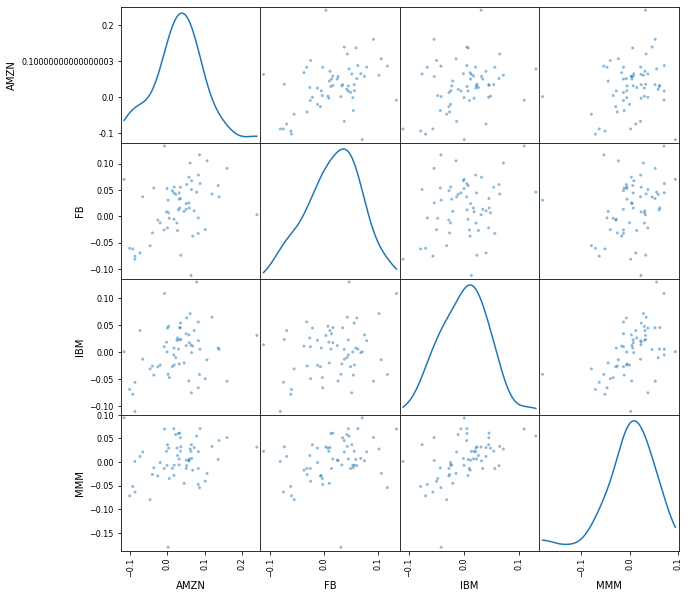

In [18]:
scatter_matrix(month_returns_drop_na,diagonal='kde', figsize=(10, 10))

You can see that most stocks have a positive correlation 